# Import Basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data

In [3]:
file_path = r'S:\Projects\Capstone Projects\#4 TexasSalaryPred\salary.csv'

data = pd.read_csv(file_path)

In [4]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


# Handling Missing Values

In [5]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64


In [6]:
# Drop columns with a large number of missing values
columns_to_drop = ['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 
                   'summed_annual_salary', 'hide_from_search']
data1 = data.drop(columns=columns_to_drop)

# Check the updated dataset
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  EMPLOY DATE   149481 non-null  object 
 11  HRLY RATE     149481 non-null  float64
 12  HRS PER WK    149481 non-null  float64
 13  MONTHLY       149481 non-null  float64
 14  ANNUAL        149481 non-null  float64
 15  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ MB
None


In [7]:
missing_values = data1.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
EMPLOY DATE     0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
dtype: int64


# Relevant columns based on the tasks

In [8]:
relevant_columns = [
    'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 
    'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL'
]
data_selected = data1[relevant_columns]



## Dropped columns like:
- Unique Identifiers ['AGENCY, 'STATE NUMBER']
- Personal Information [LAST NAME', 'FIRST NAME', and 'MI']
- Non-Salary Related Columns [EMPLOY DATE','AGENCY NAME']

In [9]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CLASS CODE   149481 non-null  object 
 1   CLASS TITLE  149481 non-null  object 
 2   ETHNICITY    149481 non-null  object 
 3   GENDER       149481 non-null  object 
 4   STATUS       149481 non-null  object 
 5   HRLY RATE    149481 non-null  float64
 6   HRS PER WK   149481 non-null  float64
 7   MONTHLY      149481 non-null  float64
 8   ANNUAL       149481 non-null  float64
dtypes: float64(4), object(5)
memory usage: 10.3+ MB


# One-hot encoding :

### Working on : 'CLASS CODE', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS'

In [10]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data_selected['CLASS CODE'] = LE.fit_transform(data_selected['CLASS CODE'])
data_selected['CLASS TITLE'] = LE.fit_transform(data_selected['CLASS TITLE'])
data_selected['ETHNICITY'] = LE.fit_transform(data_selected['ETHNICITY'])
data_selected['GENDER'] = LE.fit_transform(data_selected['GENDER'])
data_selected['STATUS'] = LE.fit_transform(data_selected['STATUS'])

In [11]:
# dataset after One-hot encoding :
data_selected

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
0,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
1,616,560,5,1,4,81.04454,4.0,1404.77,16857.24
2,1409,711,5,1,8,75.96150,29.0,9545.82,114549.84
3,616,560,5,1,4,81.04453,4.0,1404.77,16857.24
4,810,292,3,0,0,0.00000,40.0,3284.27,39411.24
...,...,...,...,...,...,...,...,...,...
149476,1042,1198,5,1,0,0.00000,40.0,2899.00,34788.00
149477,84,1404,5,0,0,0.00000,40.0,5500.00,66000.00
149478,4,324,5,1,1,12.93000,20.0,1120.60,13447.20
149479,278,1007,5,1,0,0.00000,40.0,5744.16,68929.92


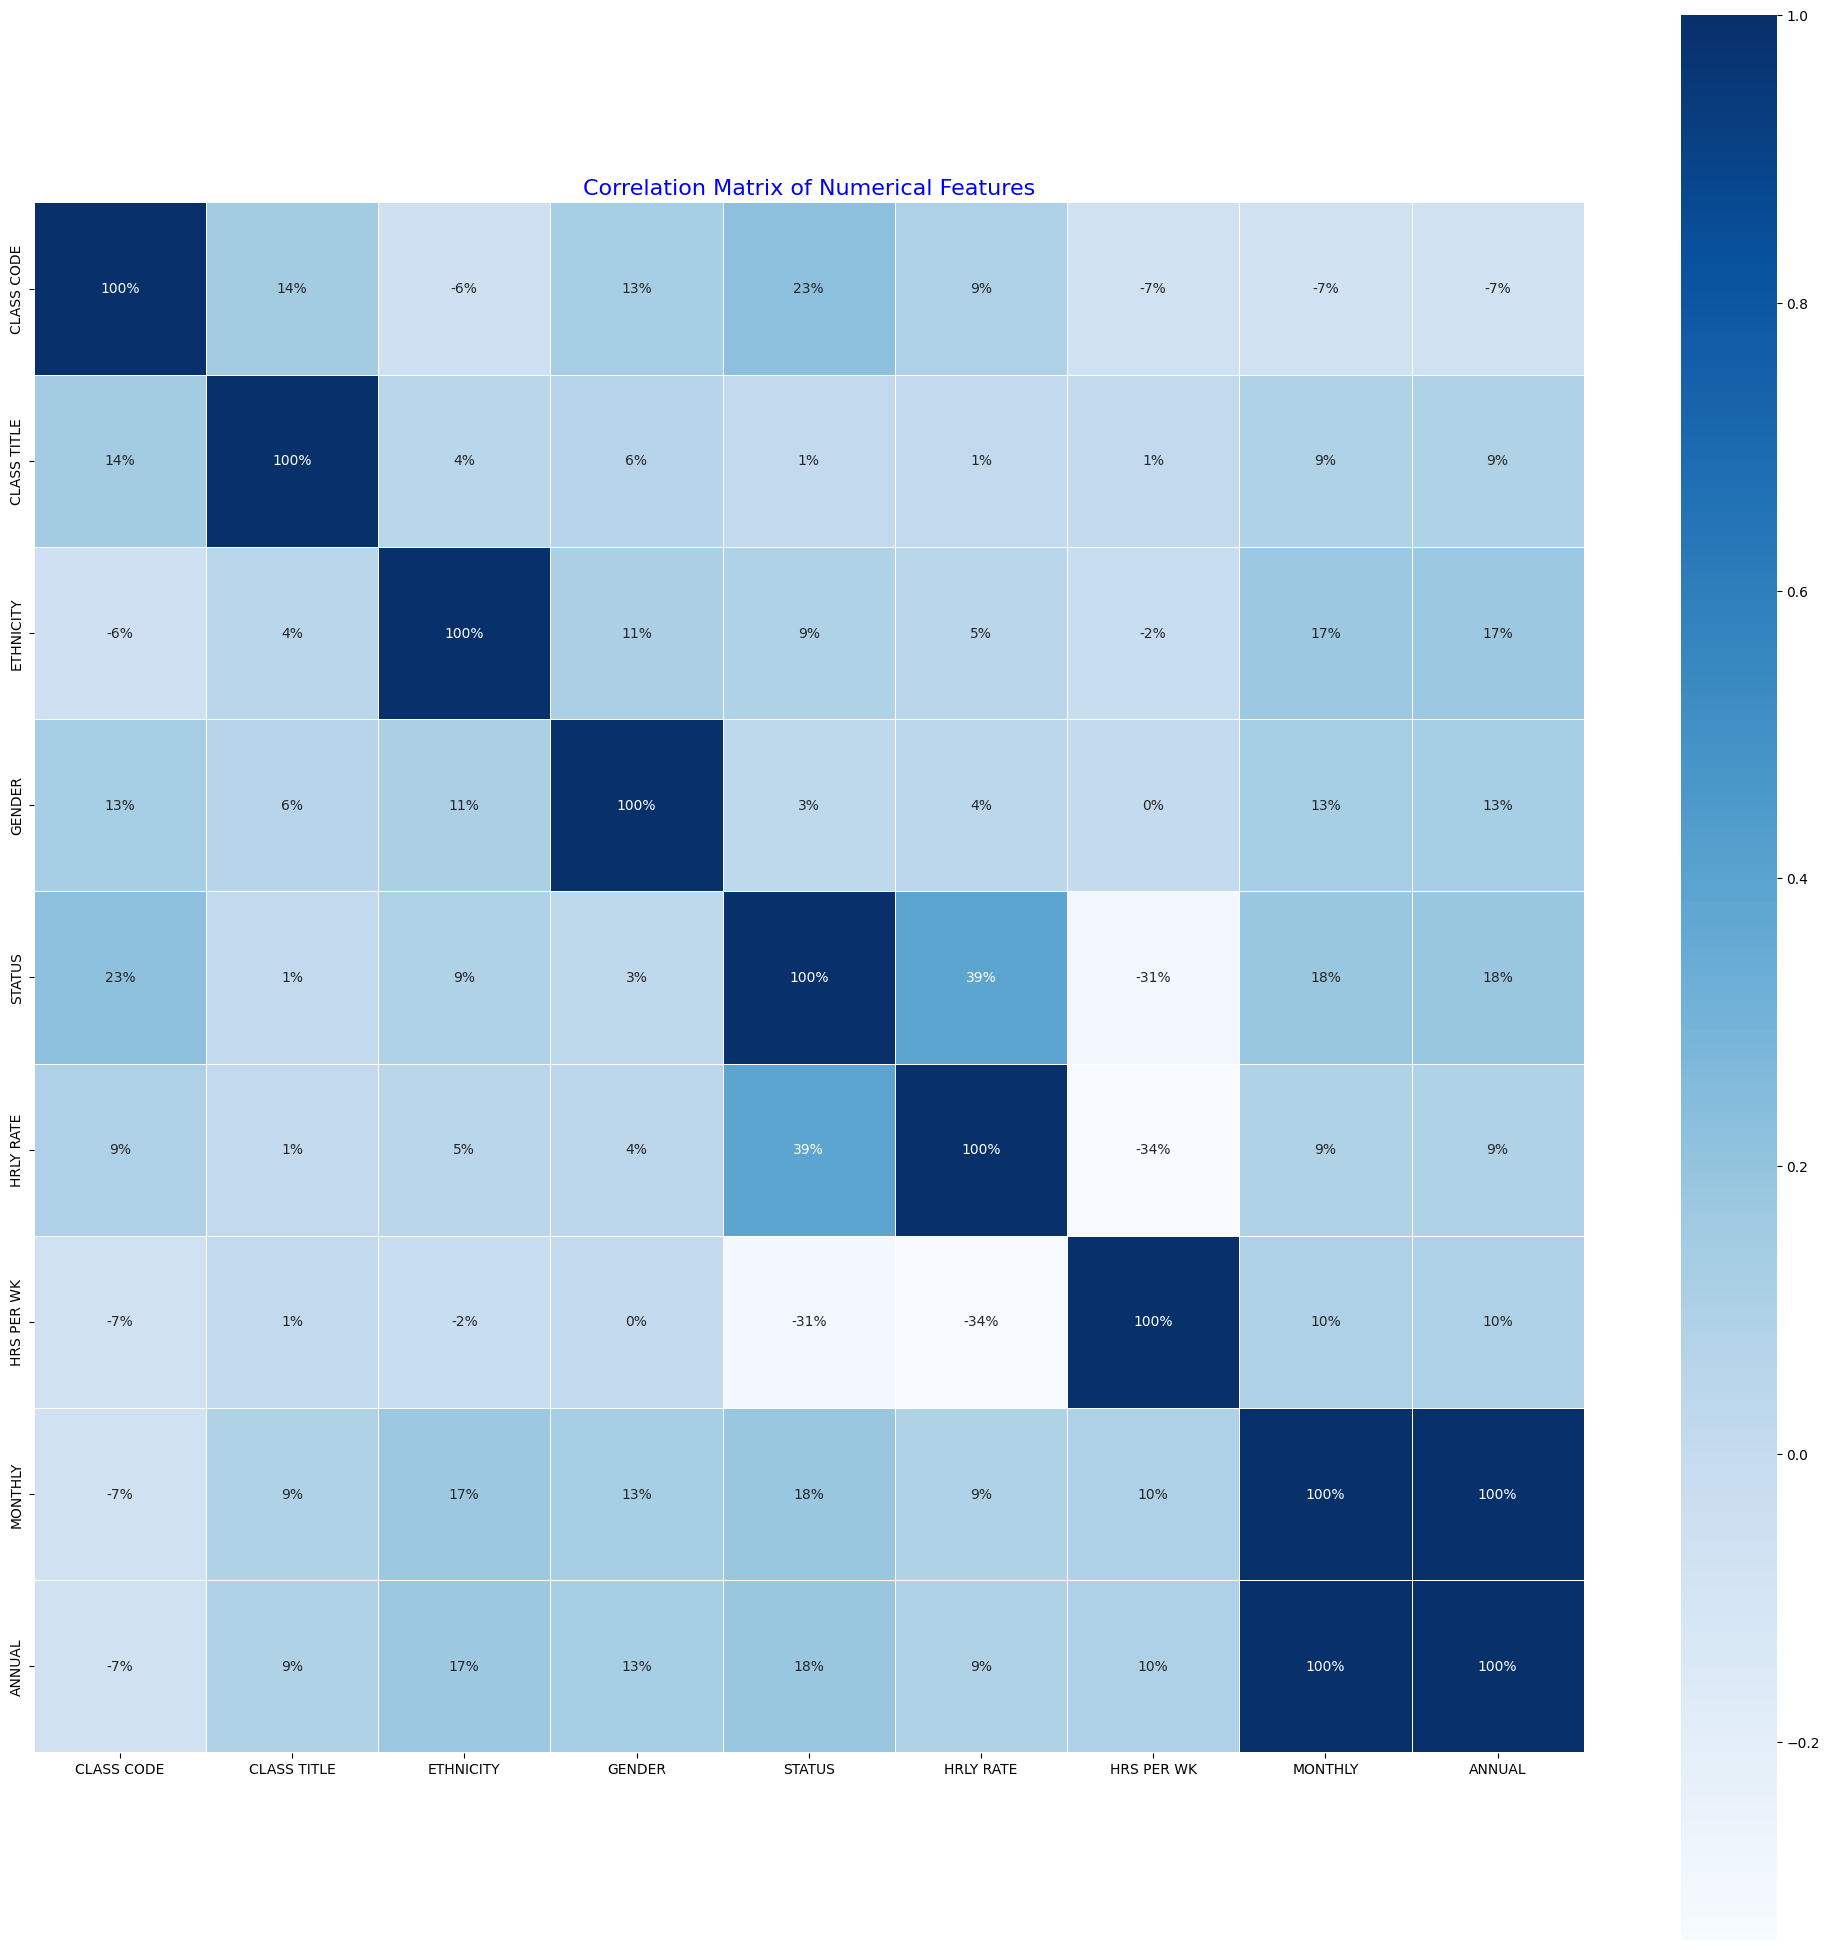

In [12]:
# Compute correlation matrix
correlation_matrix = data_selected.corr()

### corr heatmap
colormap = plt.cm.viridis
plt.figure(figsize=(25,25))
plt.title('Correlation Matrix of Numerical Features' ,fontsize=16 ,color="blue" )
sns.heatmap(correlation_matrix,linewidths=0.6, square=True, cmap='Blues',fmt='.0%', linecolor='white', annot=True)
plt.show()


In [13]:
data_selected.corr()

,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL
CLASS CODE,1.000000,0.144373,-0.056818,0.127360,0.225200,0.091614,-0.068355,-0.074360,-0.074360
CLASS TITLE,0.144373,1.000000,0.044255,0.060309,0.009949,0.014504,0.011968,0.085747,0.085747
ETHNICITY,-0.056818,0.044255,1.000000,0.106739,0.090649,0.051916,-0.023782,0.170107,0.170107
GENDER,0.127360,0.060309,0.106739,1.000000,0.033160,0.041537,0.001952,0.129265,0.129265
STATUS,0.225200,0.009949,0.090649,0.033160,1.000000,0.388160,-0.306624,0.183917,0.183917
HRLY RATE,0.091614,0.014504,0.051916,0.041537,0.388160,1.000000,-0.337784,0.086291,0.086291
HRS PER WK,-0.068355,0.011968,-0.023782,0.001952,-0.306624,-0.337784,1.000000,0.096041,0.096041
MONTHLY,-0.074360,0.085747,0.170107,0.129265,0.183917,0.086291,0.096041,1.000000,1.000000
ANNUAL,-0.074360,0.085747,0.170107,0.129265,0.183917,0.086291,0.096041,1.000000,1.000000


# "Analyzing Relationships: Insights from Correlation Matrix"

- This correlation matrix represents the relationships between different variables in your dataset. The values in the matrix range from -1 to 1, indicating the strength and direction of the linear relationship between pairs of variables. Here's how you can interpret the correlation matrix based on the provided data:

    - Strong Positive Correlation (Close to 1):
    HRLY RATE and STATUS have a relatively strong positive correlation of 0.388160. This suggests that there is a moderate positive linear relationship between hourly rate and status. As the status level increases, the hourly rate tends to increase as well.
    Similarly, there is a moderate positive correlation between MONTHLY and ANNUAL salaries, which is expected since monthly and annual salaries are directly related.

    - Weak to Moderate Positive Correlation (0 to 0.5):
    STATUS and CLASS CODE have a moderate positive correlation of 0.225200. This indicates that there is some positive linear relationship between the class code of employees and their status within the organization.
    GENDER and ETHNICITY have a weak positive correlation with each other and with other variables in the dataset. This suggests that there is a slight tendency for certain genders or ethnicities to be associated with specific statuses or hourly rates, but the relationship is not strong.

    - Weak Negative Correlation (Close to -1):
    There are no strong negative correlations in the provided matrix, indicating that variables are generally either positively correlated or not strongly correlated at all.
    
    - No Correlation (Close to 0):
    HRS PER WK shows weak correlation with other variables in the dataset, suggesting that the number of hours worked per week is not strongly related to other factors in this context.

- Overall, the correlation matrix helps identify which variables have stronger or weaker relationships with each other

# Now our data is ready for Model Creation.